# High frequency variabilities

In [1]:
%load_ext ferretmagic

### Literature : Waves, Tides and Shallow water Processes
![aviso sea level](Images/HighFreq.png)

### Prominent tidal constituents 
<img src="Images/Tidal_constituent_sum.gif" width="500" height="500"> 

* A great explanation of tides can be found in youtube.com/watch?v=IgF3OX8nT0w

### Location of Kakinada tide gauge 

! Enter_GO basemap x=75:95 Y=7:24n 5
! Exit_GO


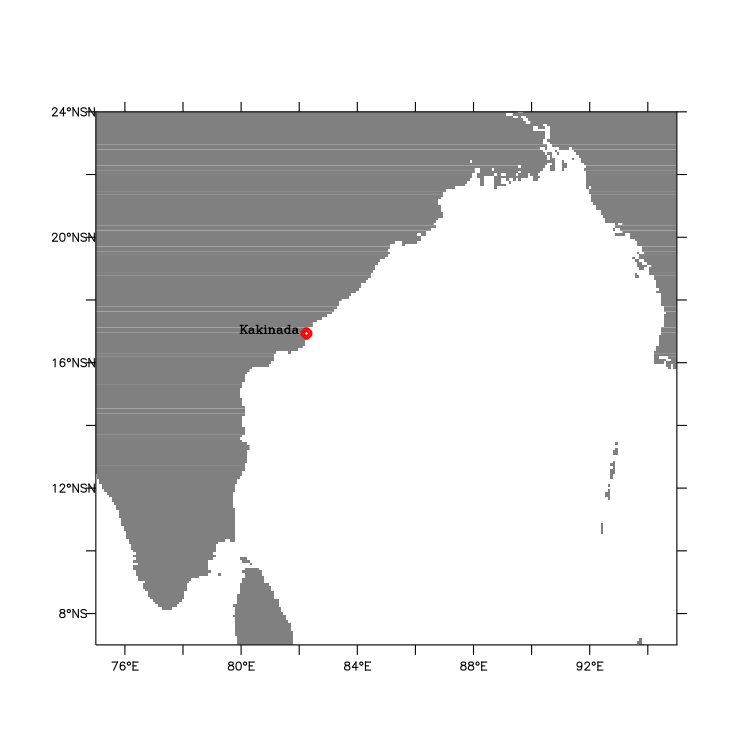

In [3]:
%%ferret
set win/as=1
GO basemap x=75:95 Y=7:24n 5

let TG_lon = {82.250}
let TG_lat = {16.933}
plot/over/sym=28/vs/thick/color=red/nolab TG_lon,TG_lat
plot/over/sym=27/vs/thick/color=red/nolab TG_lon,TG_lat

label `TG_lon[i=5]-0.25`,`TG_lat[i=5]`,1,0,.1 @CRKakinada


### Plot the hourly time series 


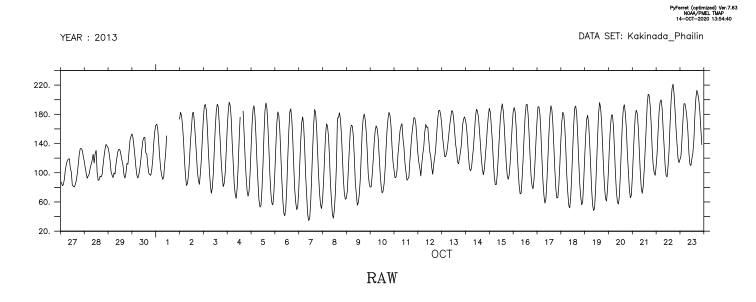

In [4]:
%%ferret
use Data/TG/Cylone/Kakinada_Phailin.nc
set win/asp=0.4
plot raw

### Frequency Spectrum of Kakinada


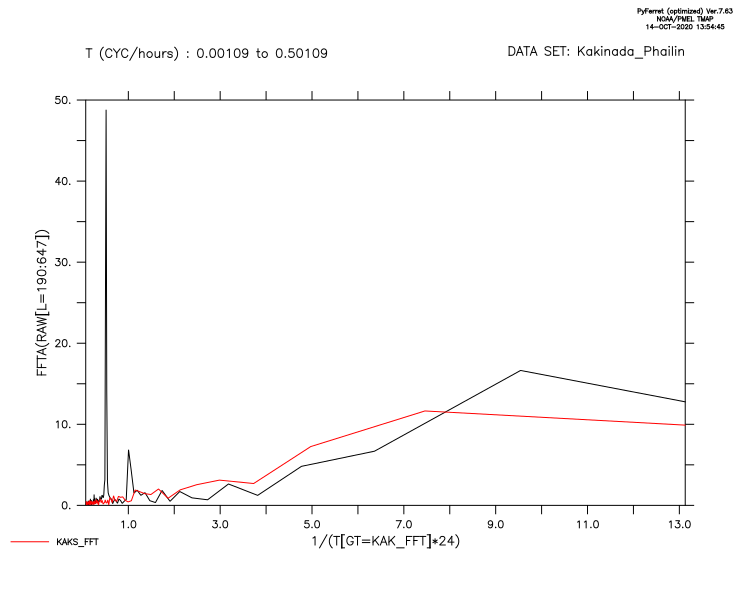

In [5]:
%%ferret
let Kak_fft = ffta(raw[l=190:647])  ;  let K_Hr = 1/(t[gt=Kak_fft]*24)
let Kaks_fft = ffta(sla[l=290:647]) ;  let Ks_Hr = 1/(t[gt=Kaks_fft]*24)
set win/asp=0.8

plot/vs/line/color=black/hlimi=0.2:13  K_Hr,Kak_fft
plot/vs/line/color=red/hlimi=0.2:3/over Ks_Hr,Kaks_fft

### zoom the spectrum


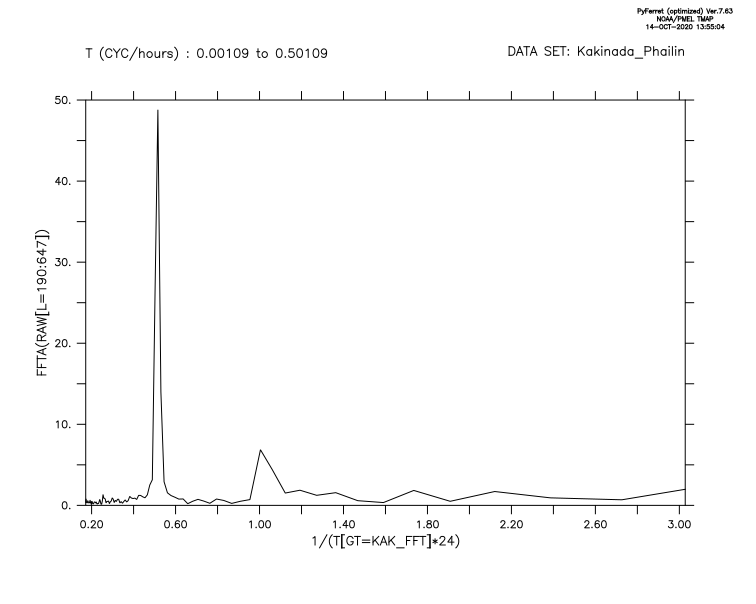

In [6]:
%%ferret
set win/asp=0.8

plot/vs/line/color=black/hlimi=0.2:3  K_Hr,Kak_fft

### TIDAL ANALYSIS BY HARMONIC METHOD

In [8]:
%%bash
cd Codes/
gfortran tira.f
./a.out

     
 TIRA  - TIDAL ANALYSIS BY HARMONIC METHOD
 ****

 SAMPLE INTERVAL (HOURS) =    1.000

 INITIAL MEAN       =         0.127688D+03
 STANDARD DEVIATION =         0.407377D+02
 DELT               =         0.100000D+01
 SOLVING BY PIVOTAL CONDENSATION...
......PREDICTIONS ARE GENERATED
......RESIDUALS ARE GENERATED


tira.f:123:72:

  123 |    10 GGIV(I)=GGIV(I)*RAD
      |                                                                        1
tira.f:133:72:

  133 |    12 BETA(I)=BETA(I)*RAD
      |                                                                        1
tira.f:140:72:

  140 |    14 SIG(J+I)=SIG(J+I)*RAD
      |                                                                        1
tira.f:152:72:

  152 |    15 VSTART(I)=VSTART(I)*RAD
      |                                                                        1
tira.f:202:72:

  202 |     3 Y(I)=0.0D0
      |                                                                        1
tira.f:213:72:

  213 |     4 READ(10,1011) (HDR(L1,L2),L2=1,80)
      |                                                                        1
tira.f:242:72:

  242 |     5 rohith=1
      |                                                                        1
tira.f:269:72:

  269 |       IF (DIFF - 2.E-6) 820,821,821
      |               

In [2]:
! cat Codes/output.pri

 SAMPLE INTERVAL (HOURS) =    1.000
 BLOCK NO     1   RECORD       2   TO RECORD     108
                      TS     1.0        TE   107.0
 BLOCK NO     2   RECORD     121   TO RECORD     182
                      TS   120.0        TE   181.0
 BLOCK NO     3   RECORD     185   TO RECORD     279
                      TS   184.0        TE   278.0
 BLOCK NO     4   RECORD     281   TO RECORD     647
                      TS   280.0        TE   646.0

 INITIAL MEAN       =         0.127688D+03
 STANDARD DEVIATION =         0.407377D+02
 DELT               =         0.100000D+01
1******** T.I.R.A.  (G.P.) ********
 Comment line 1: Analysis of one month of sea level data                         
 Comment line 2: Analysis of one month of sea level data                         
 Comment line 3: Analysis of one month of sea level data                         
 Comment line 4: Analysis of one month of sea level data                         
 OBS M= 0.1277D+03  SD= 0.4074D+02   RES M=-0.1361D-05


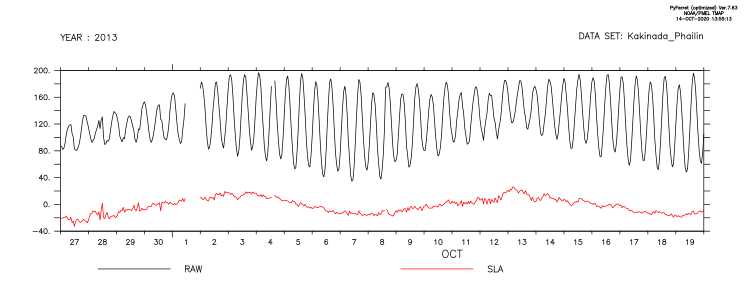

In [9]:
%%ferret
set win/asp=.4
pl/t=27-Sep-2013:20-Oct-2013 raw,sla


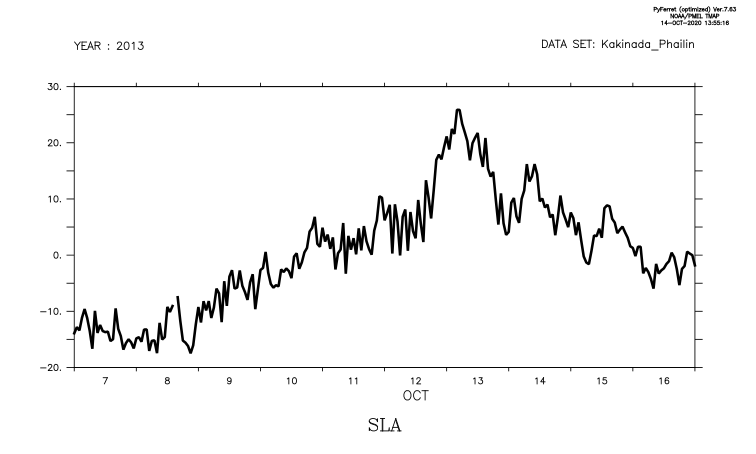

In [10]:
%%ferret
set win/asp=.6
pl/t=07-oct-2013:17-oct-2013/thick=3 sla